In [2]:
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.linear_model import Perceptron
from sklearn.preprocessing import StandardScaler

In [3]:
iris = datasets.load_iris()

In [5]:
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [6]:
x = iris.data[0:100, [2,3]]
y = iris.target[0:100]

In [7]:
print(x[0:5,:])

[[1.4 0.2]
 [1.4 0.2]
 [1.3 0.2]
 [1.5 0.2]
 [1.4 0.2]]


In [8]:
print('Class labels:', np.unique(y))

Class labels: [0 1]


In [9]:
labels = ['setosa', 'versicolor', 'virginica']

In [10]:
sc = StandardScaler()
sc.fit(x)
xstd = sc.transform(x)
print(xstd[0:5,:])

[[-1.01297765 -1.04211089]
 [-1.01297765 -1.04211089]
 [-1.08231219 -1.04211089]
 [-0.94364311 -1.04211089]
 [-1.01297765 -1.04211089]]


In [11]:
model = Perceptron(max_iter=100, eta0=0.01)
model.fit(xstd, y)
y_pred=model.predict(x)

In [12]:
print(model.coef_, model.intercept_)

[[0.0152536  0.01422677]] [0.]


In [13]:
error = np.mean((y-y_pred)**2)
print(error)

0.5


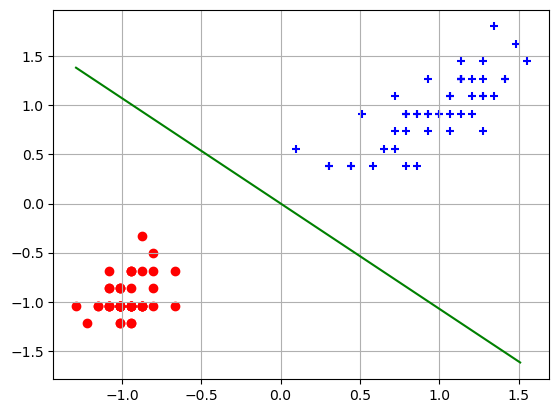

In [15]:
plt.scatter(xstd[y==0,0], xstd[y==0,1], color='red', marker='o', label=labels[0])
plt.scatter(xstd[y==1,0], xstd[y==1,1], color='blue', marker='+', label=labels[0])

xx = np.arange(xstd[:,0].min(), xstd[:,0].max(), 0.1)
yy = -model.coef_[0,0]/model.coef_[0,1] * xx - model.intercept_/model.coef_[0,1]

plt.plot(xx,yy, 'g-')
plt.grid()
plt.show()